<a href="https://colab.research.google.com/github/CVanchieri/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/2_LoadingData_Lecture%26Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [1]:
# find the actual file to download.
# label the url.
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
# use !curl to show the data before we load it.
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
# its always good to check the data you are importing.

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# step 2 - load the data

# import pandas to load the .csv file.
import pandas as pd

# label the data set and use pd.read_csv() to import the data set.
flag_data = pd.read_csv(flag_data_url)

In [3]:
# Step 3 - verify we've got *something*

# show the header of the data set.
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [4]:
# Step 4 - Looks a bit odd - verify that it is what we want

# show all the counts for each column.
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [5]:
# show if the data set has any NA values.
flag_data.isna().sum()

Afghanistan    0
5              0
1              0
648            0
16             0
10             0
2              0
0              0
3              0
5.1            0
1.1            0
1.2            0
0.1            0
1.3            0
1.4            0
1.5            0
0.2            0
green          0
0.3            0
0.4            0
0.5            0
0.6            0
1.6            0
0.7            0
0.8            0
1.7            0
0.9            0
0.10           0
black          0
green.1        0
dtype: int64

In [6]:
# !curl | wc will show us some information of the data set prior to loading.
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  91257      0 --:--:-- --:--:-- --:--:-- 90714
    194     194   15240


In [7]:
# So we have 193 observations with funny names, file has 194 rows.
# Looks like the file has no header row, but read_csv assumes it does.
# help() will show us how pd.read_csv works.
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
# ? give more help info.
?pd.read_csv

In [0]:
# ?? give more help info.
??pd.read_csv

In [10]:
# to push the current header down the to 1st row and display the actualy header columns we can use header=None.
# reload the data with header=None to push to data set down and show the header.
flag_data = pd.read_csv(flag_data_url, header=None)

# show the new data set with the correct headers.
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [11]:
# sbow the new counts in each column.
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [12]:
# confirm there are no missing values.
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [13]:
# we can label all the columns with the corresponding text above.
col_headers = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red',
              'green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters',
              'sunstars','crescent','triangle','icon','animate','text','topleft','botright']

# add the new col_headers the data set we have.
flag_data = pd.read_csv(flag_data_url, header=None, names=col_headers)

# show the data set with the new header names.
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [14]:
# change the language column to show the actual language not a #.
flag_data['language'] = flag_data['language'].map({1: 'English', 2:'Spanish', 3:'French', 4:'German', 5:'Slavic', 6:'Other Indo-European', 7:'Chinese', 8:'Arabic', 9:'Japanese/Turkish/Finnish/Magyar', 10:'Others'})

# show the data set with the new language text.
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,Others,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,Other Indo-European,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,Arabic,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,English,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,Other Indo-European,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [15]:
# we can see how many countries speak the language.
flag_data.language.value_counts()

Others                             46
English                            43
Other Indo-European                30
Spanish                            21
Arabic                             19
French                             17
German                              6
Slavic                              4
Chinese                             4
Japanese/Turkish/Finnish/Magyar     4
Name: language, dtype: int64

##Reading other CSV's.

In [0]:
import pandas as pd
# we can load up a single .csv file or set up multiple.
link1 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions.csv'
link2 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_index.csv'
link3 = 'https://raw.githubusercontent.com/BJanota11/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module2-loadingdata/drinks_with_regions_header.csv'

In [17]:
# the link1 data set look fairly clean.

# read the link1 .csv file with pd.read_csv().
df1 = pd.read_csv(link1)

# show the dat set shape.
print(df1.shape)

# show the data set headers.
df1.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [18]:
# the link2 data set show an 'unnamed' column that was indexed, should not be there.

# read the link2 .csv file with pd.read_csv().
df2 = pd.read_csv(link2)

# show the dat set shape.
print(df2.shape)

# show the data set headers.
df2.head()

(193, 8)


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,1,Albania,89,132,54,4.9,Europe,Southern Europe
2,2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [19]:
# remove the initial column 'unnamed' by loading the data set with index_col=0.
df2 = pd.read_csv(link2, index_col=0)

# show the data set shape.
print(df2.shape)

# show the data header with 'unnamed' removed.
df2.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [20]:
# set a specific range of columns that we want to use by loading the data set with usecols=range().
df2 = pd.read_csv(link2, usecols=range(1,4))

# show the shape of the data set.
print(df2.shape)

# show the data set with the specific columns we chose.
df2.head()

(193, 3)


,country,beer_servings,spirit_servings
0,Afghanistan,0,0
1,Albania,89,132
2,Algeria,25,0
3,Andorra,245,138
4,Angola,217,57


In [21]:
# load a new data set so we can drop specific rows.
df2 = pd.read_csv(link2)

# drop specific columns with .drop()[0], axis=1.
df2 = df2.drop(['Unnamed: 0', 'beer_servings'][0], axis=1)

# show the shape of the data set.
print(df2.shape)

# show the data set headers.
df2.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [22]:
# the link3 data set is not aligned properly and needs to be adjusted.

# read the link3 .csv file with pd.read_csv().
df3 = pd.read_csv(link3)

# show the dat set shape.
print(df3.shape)

# show the data set headers.
df3.head()

(196, 7)


,"Summary of Drinks by Country from WHO Report, 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,https://fivethirtyeight.com/features/dear-mona...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
3,Afghanistan,0,0,0,0,Asia,Southern Asia
4,Albania,89,132,54,4.9,Europe,Southern Europe


In [23]:
# we can see the header names in row 2/'3' so we will start the header on 3.

# load the data set with header=3.
df3 = pd.read_csv(link3, header=3)

# show the shape of the data set.
print(df3.shape)

# show the data set headers aligned properly.
df3.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [24]:
# we can see the header names in row 2/'3' so we can skip 3 rows.

# load the data set with skiprows=3.
df3 = pd.read_csv(link3, skiprows=3)

# show the shape of the data set.
print(df3.shape)

# show the data set headers aligned properly.
df3.head()

(193, 7)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,region,sub-region
0,Afghanistan,0,0,0,0.0,Asia,Southern Asia
1,Albania,89,132,54,4.9,Europe,Southern Europe
2,Algeria,25,0,14,0.7,Africa,Northern Africa
3,Andorra,245,138,312,12.4,Europe,Southern Europe
4,Angola,217,57,45,5.9,Africa,Sub-Saharan Africa


In [0]:
# we now can save this merged new data set as our own .csv
df3.to_csv('test.csv')

## Loading from a local CSV to Google Colab

In [0]:
# import a csv file from the computer, can also use the left side panel in colab.
from google.colab import files
uploaded = files.upload()

In [0]:
# import the csv file into a data frame.
import io
df = pd.read_csv(io.BytesIO(uploaded['.csv here']))

# show the shape of the data file.
print(df.shape)

# display the data headers.
df.head()

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

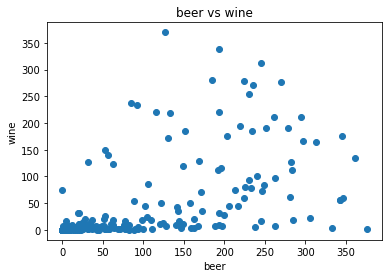

In [27]:
# import matplotlib.pyplot to create scatter and histogram graphs.
import matplotlib.pyplot as plt

# scatter Plot (x,y).
plt.scatter(df1.beer_servings, df1.wine_servings)

# give the graph a title.
plt.title('beer vs wine')

# label the x axis.
plt.xlabel('beer')

# label the y axis.
plt.ylabel('wine')

# show the scatter plot.
plt.show()

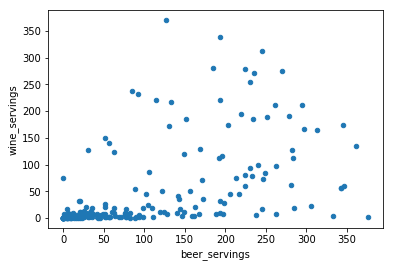

In [28]:
# pandas also does a scatter plot.
df1.plot.scatter('beer_servings', 'wine_servings');

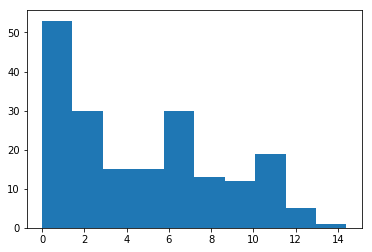

In [29]:
# create a histogram with plt.hist().
plt.hist(df1.total_litres_of_pure_alcohol);

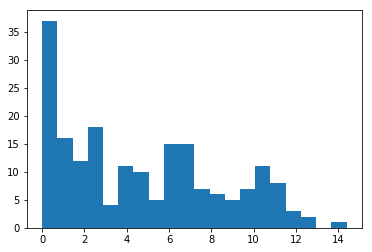

In [30]:
# create a histogram using 20 'bins' evenly distributed.
plt.hist(df1.total_litres_of_pure_alcohol, bins=20);

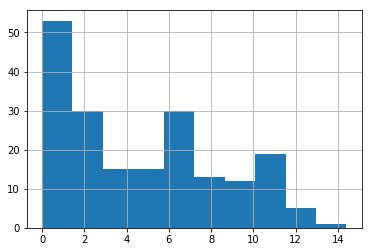

In [31]:
# create a histogram with pandas.
df1.total_litres_of_pure_alcohol.hist();

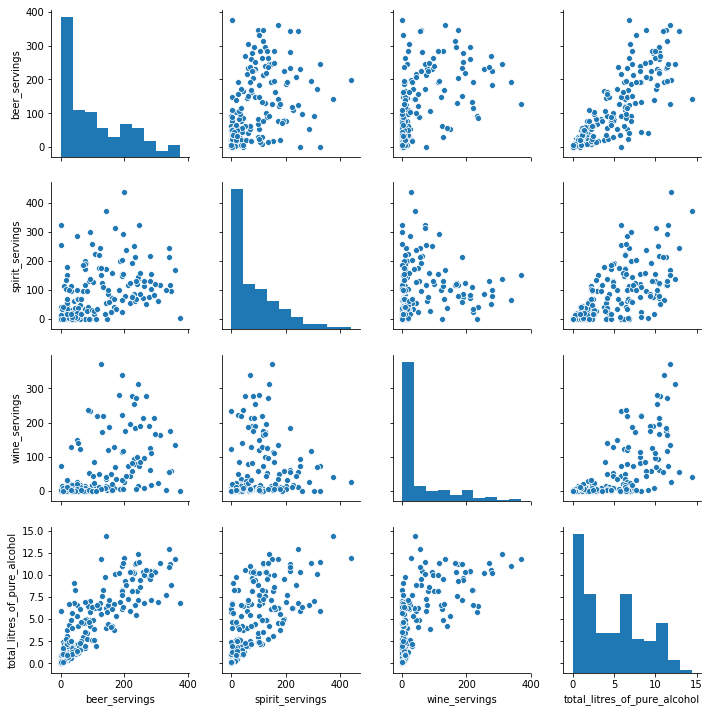

In [32]:
# import seaborn as sns for pairplot and other graphs.
import seaborn as sns

# create a pair plot density graph for the entire data set.
sns.pairplot(df1);

# Part 3 - Dealing with NA's

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [33]:
# import the csv file into a data frame.
df4 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')

# show the shape of the data file.
print(df4.shape)

# display the data headers.
df4.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# check if there are any Null values in the data set.
df4.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [35]:
# what is the ?' in the 'country' column.
df4.country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [36]:
# the '?'s are NA's so lets convert them.
# import the csv file into a data frame, show the ? as NA's.
df5 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

# show the new data frame headers.
df5.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
# check for Na's in the data set.
df5.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [38]:
# we can drop the NA's with .dropna().
df6 = df5.dropna()

# show the data set shape with the dropped NA's.
df6.shape

(30162, 15)

In [39]:
# we can also drop NA's with .drop(inplace=True).
df5.dropna(inplace=True)

# show the data set shape with the dropped NA's.
df5.shape

(30162, 15)

In [40]:
# we can specify which column and NA's you want to drop with .dropna(subset=['country'],inplace=True).
df5.dropna(subset=['country'],inplace=True)

# show the data set shape with the dropped NA's.
df5.shape

(30162, 15)

## Fill Missing Values

In [41]:
# look at the value counts for 'workclass' column.

df5.workclass.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [42]:
# show the 'mode' for each column in the data set.
df5.mode()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [0]:
mode = df5.mode()

In [44]:
# we can fill all the NA's with the corresponding mode of the column.
df5.fillna(mode)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# import the libraries that will be used.
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [46]:
# remove the initial column.
basketball_data = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/LSDS-DataSets/master/all_seasons.csv', index_col=0)
print(basketball_data.shape)
basketball_data.head(5)

(9561, 21)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,51,41,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [47]:
# changing the column header names.
col_headers = ['player','team','age','height','weight','college','country','draftyear','draftround','draftnumber','gamesplayed',
              'pointspergame','reboundspergame','assistspergame','netrating','oreboundspct','dreboundspct','usgpct','tspct','assistpct','year']
# load the data set with the column names from above.
basketball_data = pd.read_csv('https://raw.githubusercontent.com/CVanchieri/LSDS-DataSets/master/all_seasons.csv', header=0, names=col_headers)
# the data set is really big so we will take a sample of '1000'.
basketball_datasample = basketball_data.sample(1000)
# show the data frame shape.
print(basketball_datasample.shape)
# show the data frame with headers.
basketball_datasample.head(5)

(1000, 21)


,player,team,age,height,weight,college,country,draftyear,draftround,draftnumber,gamesplayed,pointspergame,reboundspergame,assistspergame,netrating,oreboundspct,dreboundspct,usgpct,tspct,assistpct,year
9117,Monta Ellis,IND,31.0,190.50,83.914520,None,USA,2005,2,40,74,8.5,2.8,3.2,-0.5,0.011,0.103,0.169,0.514,0.171,2016-17
9319,John Henson,MIL,26.0,210.82,103.872568,North Carolina,USA,2012,1,14,58,6.8,5.1,1.0,-1.8,0.093,0.202,0.164,0.550,0.076,2016-17
7922,Solomon Jones,ORL,29.0,208.28,106.594120,South Florida,USA,2006,2,33,11,1.3,1.5,0.2,-11.4,0.107,0.118,0.112,0.373,0.039,2013-14
5090,Brian Cook,ORL,27.0,205.74,113.398000,Illinois,USA,2003,1,24,51,4.7,2.1,0.5,0.6,0.053,0.153,0.207,0.489,0.073,2007-08
1500,Tim Thomas,MIL,23.0,208.28,104.326160,Villanova,USA,1997,1,7,80,11.8,4.2,1.4,-3.8,0.056,0.129,0.211,0.549,0.092,1999-00


In [48]:
# check for NaN's to change.
basketball_datasample.isnull().sum()

player             0
team               0
age                0
height             0
weight             0
college            0
country            0
draftyear          0
draftround         0
draftnumber        0
gamesplayed        0
pointspergame      0
reboundspergame    0
assistspergame     0
netrating          0
oreboundspct       0
dreboundspct       0
usgpct             0
tspct              0
assistpct          0
year               0
dtype: int64

## Graphs.

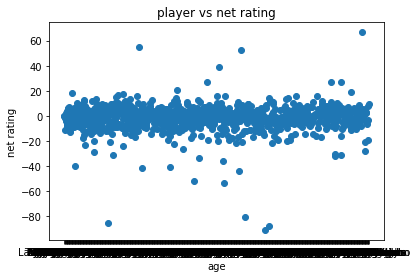

In [49]:
# show a scatterplot of 'player' & 'net rating'.
plt.scatter(basketball_datasample.player, basketball_datasample.netrating)
# give the graph a title.
plt.title('player vs net rating')
# label the x axis.
plt.xlabel('age')
# labvel the y axis.
plt.ylabel('net rating')
# display the graph.
plt.show()

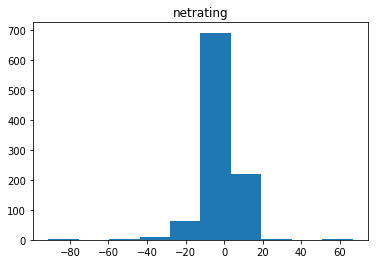

In [50]:
# histogram for 'net rating' with using plt.
plt.hist(basketball_datasample.netrating);
# give the graph a title.
plt.title('netrating')
# display the graph.
plt.show()

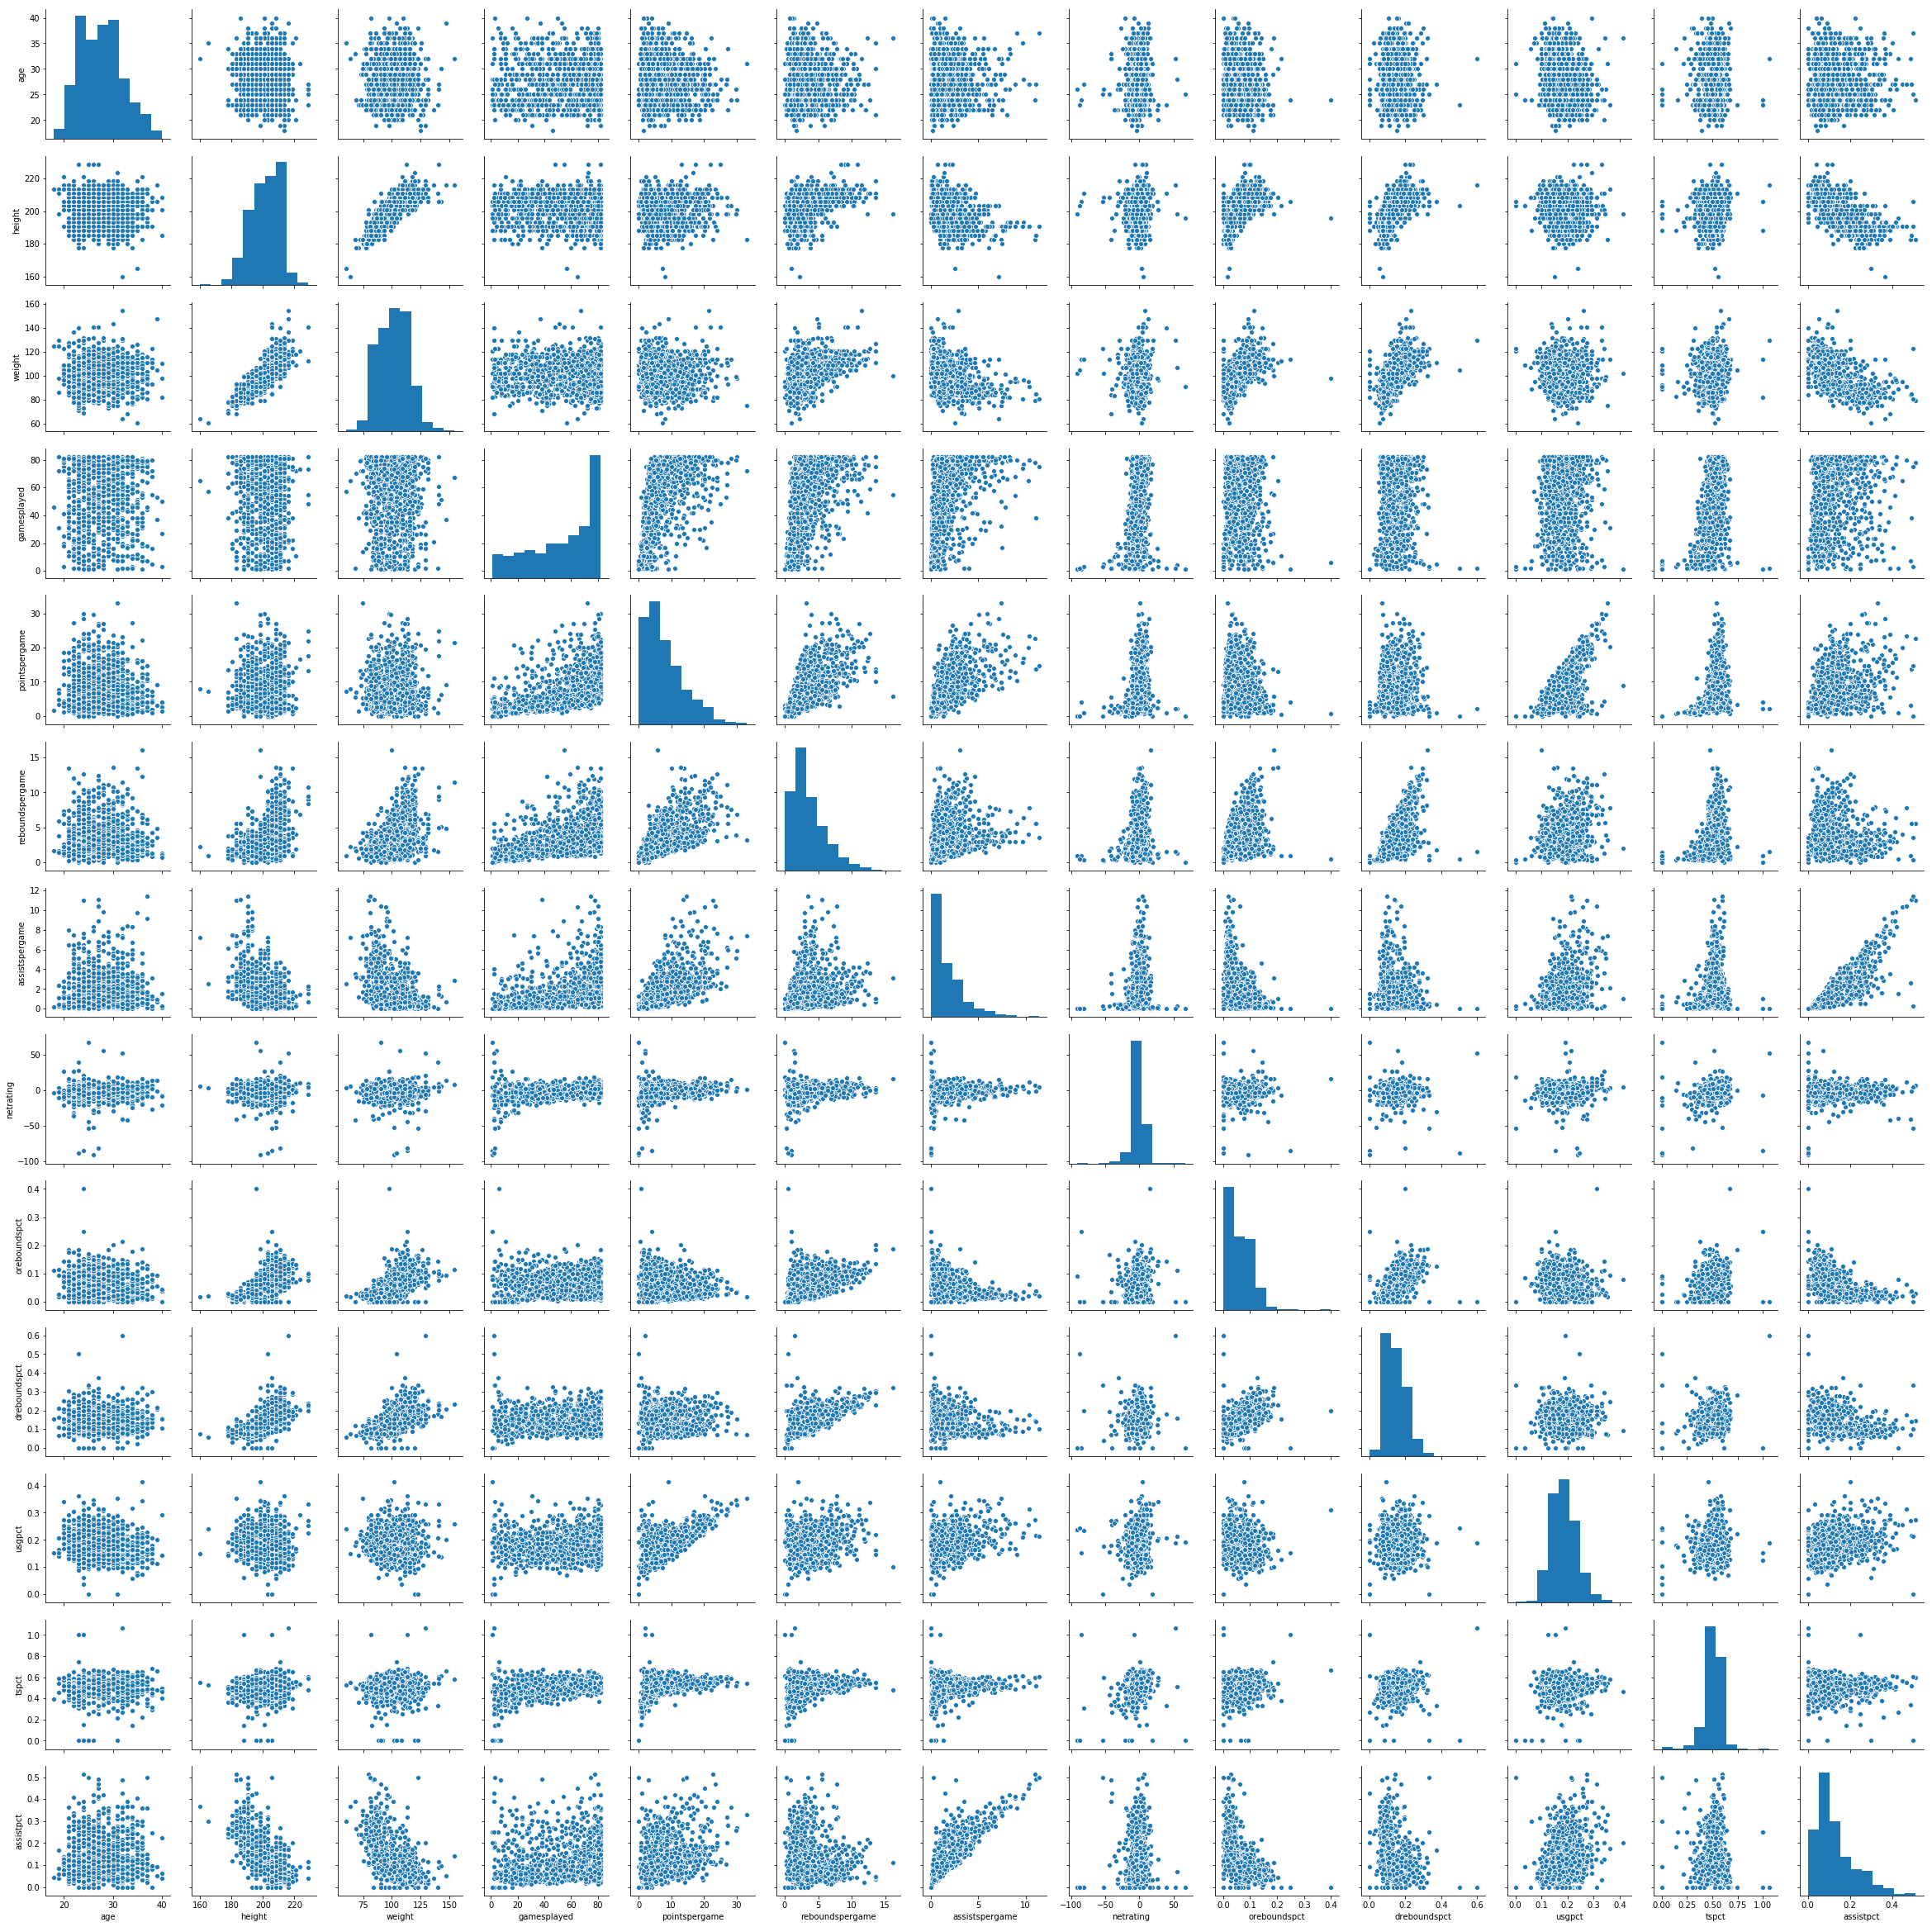

In [51]:
# seaborn density plot.
sns.pairplot(basketball_datasample)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.